# 0. IMPORT LIBRARIES

In [1]:
globals().clear
import time
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from datetime import datetime
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. LOAD AND FORMAT DATA

In [3]:
#Load Dataset
df = pd.read_csv('/Users/stevenwhang/Capstone/Datasets/df.csv')
DATETIME = df.DATETIME
df.shape

(10843, 75)

In [17]:
# Load dataset
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/data/'
file = 'df.csv'
df = pd.read_csv(path+file)
DATETIME = df.DATETIME
df.shape

(10758, 75)

# 2. CREATE THE MODEL: Train 60 days and predict 15 minutes

In [4]:
import time
file_name = 'SVR.60d.15min'
step_rows  = 1     #22*20 #110    (15 minutes)
total_rows = 10758         #      (24 months)
train_rows = 60*22 #420*22 #9240. (03 months)

scale_X = MinMaxScaler()
model = SVR(kernel = 'rbf')

result = pd.DataFrame(columns = ['DATETIME', 'ACTUAL', 'PREDICTED', 'DIFFERENCE', 'TRAIN_DURATION'])

for i in range(0, total_rows - train_rows, step_rows):

  st = time.time()
  # 1. Obtain X and y
  train, test = df.iloc[i:train_rows+i, 1:], df.iloc[train_rows+i:train_rows+i+step_rows, 1:]
  X_train, y_train  = train.iloc[:,:-1], train.iloc[:,-1]
  X_test , y_test   = test.iloc[:,:-1] , test.iloc[:,-1]

  # 2. Scale X
  X_train = scale_X.fit_transform(X_train)
  X_test = scale_X.transform(X_test)
  
  # 3. Fit and Predict 
  model.fit(X_train,y_train)
  y_hat = model.predict(X_test)
  et = time.time()

  # 4. Save data with prediction
  fecha = DATETIME.iloc[train_rows+i:train_rows+i+step_rows]
  datos = {'DATETIME': fecha.ravel(), 'ACTUAL': y_test.ravel(), 'PREDICTED': y_hat.ravel(), 'DIFFERENCE': abs(y_hat.ravel()-y_test.ravel()), 'TRAIN_DURATION': np.full(y_hat.ravel().shape[0], et-st)}
  data = pd.DataFrame(data = datos)
  result = result.append(data)

  print("Count Down: ", math.trunc((total_rows-train_rows-i)/step_rows))
  #print(data.head())

Count Down:  9438
Count Down:  9437
Count Down:  9436
Count Down:  9435
Count Down:  9434
Count Down:  9433
Count Down:  9432
Count Down:  9431
Count Down:  9430
Count Down:  9429
Count Down:  9428
Count Down:  9427
Count Down:  9426
Count Down:  9425
Count Down:  9424
Count Down:  9423
Count Down:  9422
Count Down:  9421
Count Down:  9420
Count Down:  9419
Count Down:  9418
Count Down:  9417
Count Down:  9416
Count Down:  9415
Count Down:  9414
Count Down:  9413
Count Down:  9412
Count Down:  9411
Count Down:  9410
Count Down:  9409
Count Down:  9408
Count Down:  9407
Count Down:  9406
Count Down:  9405
Count Down:  9404
Count Down:  9403
Count Down:  9402
Count Down:  9401
Count Down:  9400
Count Down:  9399
Count Down:  9398
Count Down:  9397
Count Down:  9396
Count Down:  9395
Count Down:  9394
Count Down:  9393
Count Down:  9392
Count Down:  9391
Count Down:  9390
Count Down:  9389
Count Down:  9388
Count Down:  9387
Count Down:  9386
Count Down:  9385
Count Down:  9384
Count Down

Count Down:  8982
Count Down:  8981
Count Down:  8980
Count Down:  8979
Count Down:  8978
Count Down:  8977
Count Down:  8976
Count Down:  8975
Count Down:  8974
Count Down:  8973
Count Down:  8972
Count Down:  8971
Count Down:  8970
Count Down:  8969
Count Down:  8968
Count Down:  8967
Count Down:  8966
Count Down:  8965
Count Down:  8964
Count Down:  8963
Count Down:  8962
Count Down:  8961
Count Down:  8960
Count Down:  8959
Count Down:  8958
Count Down:  8957
Count Down:  8956
Count Down:  8955
Count Down:  8954
Count Down:  8953
Count Down:  8952
Count Down:  8951
Count Down:  8950
Count Down:  8949
Count Down:  8948
Count Down:  8947
Count Down:  8946
Count Down:  8945
Count Down:  8944
Count Down:  8943
Count Down:  8942
Count Down:  8941
Count Down:  8940
Count Down:  8939
Count Down:  8938
Count Down:  8937
Count Down:  8936
Count Down:  8935
Count Down:  8934
Count Down:  8933
Count Down:  8932
Count Down:  8931
Count Down:  8930
Count Down:  8929
Count Down:  8928
Count Down

Count Down:  8526
Count Down:  8525
Count Down:  8524
Count Down:  8523
Count Down:  8522
Count Down:  8521
Count Down:  8520
Count Down:  8519
Count Down:  8518
Count Down:  8517
Count Down:  8516
Count Down:  8515
Count Down:  8514
Count Down:  8513
Count Down:  8512
Count Down:  8511
Count Down:  8510
Count Down:  8509
Count Down:  8508
Count Down:  8507
Count Down:  8506
Count Down:  8505
Count Down:  8504
Count Down:  8503
Count Down:  8502
Count Down:  8501
Count Down:  8500
Count Down:  8499
Count Down:  8498
Count Down:  8497
Count Down:  8496
Count Down:  8495
Count Down:  8494
Count Down:  8493
Count Down:  8492
Count Down:  8491
Count Down:  8490
Count Down:  8489
Count Down:  8488
Count Down:  8487
Count Down:  8486
Count Down:  8485
Count Down:  8484
Count Down:  8483
Count Down:  8482
Count Down:  8481
Count Down:  8480
Count Down:  8479
Count Down:  8478
Count Down:  8477
Count Down:  8476
Count Down:  8475
Count Down:  8474
Count Down:  8473
Count Down:  8472
Count Down

Count Down:  8068
Count Down:  8067
Count Down:  8066
Count Down:  8065
Count Down:  8064
Count Down:  8063
Count Down:  8062
Count Down:  8061
Count Down:  8060
Count Down:  8059
Count Down:  8058
Count Down:  8057
Count Down:  8056
Count Down:  8055
Count Down:  8054
Count Down:  8053
Count Down:  8052
Count Down:  8051
Count Down:  8050
Count Down:  8049
Count Down:  8048
Count Down:  8047
Count Down:  8046
Count Down:  8045
Count Down:  8044
Count Down:  8043
Count Down:  8042
Count Down:  8041
Count Down:  8040
Count Down:  8039
Count Down:  8038
Count Down:  8037
Count Down:  8036
Count Down:  8035
Count Down:  8034
Count Down:  8033
Count Down:  8032
Count Down:  8031
Count Down:  8030
Count Down:  8029
Count Down:  8028
Count Down:  8027
Count Down:  8026
Count Down:  8025
Count Down:  8024
Count Down:  8023
Count Down:  8022
Count Down:  8021
Count Down:  8020
Count Down:  8019
Count Down:  8018
Count Down:  8017
Count Down:  8016
Count Down:  8015
Count Down:  8014
Count Down

Count Down:  7610
Count Down:  7609
Count Down:  7608
Count Down:  7607
Count Down:  7606
Count Down:  7605
Count Down:  7604
Count Down:  7603
Count Down:  7602
Count Down:  7601
Count Down:  7600
Count Down:  7599
Count Down:  7598
Count Down:  7597
Count Down:  7596
Count Down:  7595
Count Down:  7594
Count Down:  7593
Count Down:  7592
Count Down:  7591
Count Down:  7590
Count Down:  7589
Count Down:  7588
Count Down:  7587
Count Down:  7586
Count Down:  7585
Count Down:  7584
Count Down:  7583
Count Down:  7582
Count Down:  7581
Count Down:  7580
Count Down:  7579
Count Down:  7578
Count Down:  7577
Count Down:  7576
Count Down:  7575
Count Down:  7574
Count Down:  7573
Count Down:  7572
Count Down:  7571
Count Down:  7570
Count Down:  7569
Count Down:  7568
Count Down:  7567
Count Down:  7566
Count Down:  7565
Count Down:  7564
Count Down:  7563
Count Down:  7562
Count Down:  7561
Count Down:  7560
Count Down:  7559
Count Down:  7558
Count Down:  7557
Count Down:  7556
Count Down

Count Down:  7154
Count Down:  7153
Count Down:  7152
Count Down:  7151
Count Down:  7150
Count Down:  7149
Count Down:  7148
Count Down:  7147
Count Down:  7146
Count Down:  7145
Count Down:  7144
Count Down:  7143
Count Down:  7142
Count Down:  7141
Count Down:  7140
Count Down:  7139
Count Down:  7138
Count Down:  7137
Count Down:  7136
Count Down:  7135
Count Down:  7134
Count Down:  7133
Count Down:  7132
Count Down:  7131
Count Down:  7130
Count Down:  7129
Count Down:  7128
Count Down:  7127
Count Down:  7126
Count Down:  7125
Count Down:  7124
Count Down:  7123
Count Down:  7122
Count Down:  7121
Count Down:  7120
Count Down:  7119
Count Down:  7118
Count Down:  7117
Count Down:  7116
Count Down:  7115
Count Down:  7114
Count Down:  7113
Count Down:  7112
Count Down:  7111
Count Down:  7110
Count Down:  7109
Count Down:  7108
Count Down:  7107
Count Down:  7106
Count Down:  7105
Count Down:  7104
Count Down:  7103
Count Down:  7102
Count Down:  7101
Count Down:  7100
Count Down

Count Down:  6698
Count Down:  6697
Count Down:  6696
Count Down:  6695
Count Down:  6694
Count Down:  6693
Count Down:  6692
Count Down:  6691
Count Down:  6690
Count Down:  6689
Count Down:  6688
Count Down:  6687
Count Down:  6686
Count Down:  6685
Count Down:  6684
Count Down:  6683
Count Down:  6682
Count Down:  6681
Count Down:  6680
Count Down:  6679
Count Down:  6678
Count Down:  6677
Count Down:  6676
Count Down:  6675
Count Down:  6674
Count Down:  6673
Count Down:  6672
Count Down:  6671
Count Down:  6670
Count Down:  6669
Count Down:  6668
Count Down:  6667
Count Down:  6666
Count Down:  6665
Count Down:  6664
Count Down:  6663
Count Down:  6662
Count Down:  6661
Count Down:  6660
Count Down:  6659
Count Down:  6658
Count Down:  6657
Count Down:  6656
Count Down:  6655
Count Down:  6654
Count Down:  6653
Count Down:  6652
Count Down:  6651
Count Down:  6650
Count Down:  6649
Count Down:  6648
Count Down:  6647
Count Down:  6646
Count Down:  6645
Count Down:  6644
Count Down

Count Down:  6241
Count Down:  6240
Count Down:  6239
Count Down:  6238
Count Down:  6237
Count Down:  6236
Count Down:  6235
Count Down:  6234
Count Down:  6233
Count Down:  6232
Count Down:  6231
Count Down:  6230
Count Down:  6229
Count Down:  6228
Count Down:  6227
Count Down:  6226
Count Down:  6225
Count Down:  6224
Count Down:  6223
Count Down:  6222
Count Down:  6221
Count Down:  6220
Count Down:  6219
Count Down:  6218
Count Down:  6217
Count Down:  6216
Count Down:  6215
Count Down:  6214
Count Down:  6213
Count Down:  6212
Count Down:  6211
Count Down:  6210
Count Down:  6209
Count Down:  6208
Count Down:  6207
Count Down:  6206
Count Down:  6205
Count Down:  6204
Count Down:  6203
Count Down:  6202
Count Down:  6201
Count Down:  6200
Count Down:  6199
Count Down:  6198
Count Down:  6197
Count Down:  6196
Count Down:  6195
Count Down:  6194
Count Down:  6193
Count Down:  6192
Count Down:  6191
Count Down:  6190
Count Down:  6189
Count Down:  6188
Count Down:  6187
Count Down

Count Down:  5783
Count Down:  5782
Count Down:  5781
Count Down:  5780
Count Down:  5779
Count Down:  5778
Count Down:  5777
Count Down:  5776
Count Down:  5775
Count Down:  5774
Count Down:  5773
Count Down:  5772
Count Down:  5771
Count Down:  5770
Count Down:  5769
Count Down:  5768
Count Down:  5767
Count Down:  5766
Count Down:  5765
Count Down:  5764
Count Down:  5763
Count Down:  5762
Count Down:  5761
Count Down:  5760
Count Down:  5759
Count Down:  5758
Count Down:  5757
Count Down:  5756
Count Down:  5755
Count Down:  5754
Count Down:  5753
Count Down:  5752
Count Down:  5751
Count Down:  5750
Count Down:  5749
Count Down:  5748
Count Down:  5747
Count Down:  5746
Count Down:  5745
Count Down:  5744
Count Down:  5743
Count Down:  5742
Count Down:  5741
Count Down:  5740
Count Down:  5739
Count Down:  5738
Count Down:  5737
Count Down:  5736
Count Down:  5735
Count Down:  5734
Count Down:  5733
Count Down:  5732
Count Down:  5731
Count Down:  5730
Count Down:  5729
Count Down

Count Down:  5326
Count Down:  5325
Count Down:  5324
Count Down:  5323
Count Down:  5322
Count Down:  5321
Count Down:  5320
Count Down:  5319
Count Down:  5318
Count Down:  5317
Count Down:  5316
Count Down:  5315
Count Down:  5314
Count Down:  5313
Count Down:  5312
Count Down:  5311
Count Down:  5310
Count Down:  5309
Count Down:  5308
Count Down:  5307
Count Down:  5306
Count Down:  5305
Count Down:  5304
Count Down:  5303
Count Down:  5302
Count Down:  5301
Count Down:  5300
Count Down:  5299
Count Down:  5298
Count Down:  5297
Count Down:  5296
Count Down:  5295
Count Down:  5294
Count Down:  5293
Count Down:  5292
Count Down:  5291
Count Down:  5290
Count Down:  5289
Count Down:  5288
Count Down:  5287
Count Down:  5286
Count Down:  5285
Count Down:  5284
Count Down:  5283
Count Down:  5282
Count Down:  5281
Count Down:  5280
Count Down:  5279
Count Down:  5278
Count Down:  5277
Count Down:  5276
Count Down:  5275
Count Down:  5274
Count Down:  5273
Count Down:  5272
Count Down

Count Down:  4869
Count Down:  4868
Count Down:  4867
Count Down:  4866
Count Down:  4865
Count Down:  4864
Count Down:  4863
Count Down:  4862
Count Down:  4861
Count Down:  4860
Count Down:  4859
Count Down:  4858
Count Down:  4857
Count Down:  4856
Count Down:  4855
Count Down:  4854
Count Down:  4853
Count Down:  4852
Count Down:  4851
Count Down:  4850
Count Down:  4849
Count Down:  4848
Count Down:  4847
Count Down:  4846
Count Down:  4845
Count Down:  4844
Count Down:  4843
Count Down:  4842
Count Down:  4841
Count Down:  4840
Count Down:  4839
Count Down:  4838
Count Down:  4837
Count Down:  4836
Count Down:  4835
Count Down:  4834
Count Down:  4833
Count Down:  4832
Count Down:  4831
Count Down:  4830
Count Down:  4829
Count Down:  4828
Count Down:  4827
Count Down:  4826
Count Down:  4825
Count Down:  4824
Count Down:  4823
Count Down:  4822
Count Down:  4821
Count Down:  4820
Count Down:  4819
Count Down:  4818
Count Down:  4817
Count Down:  4816
Count Down:  4815
Count Down

Count Down:  4411
Count Down:  4410
Count Down:  4409
Count Down:  4408
Count Down:  4407
Count Down:  4406
Count Down:  4405
Count Down:  4404
Count Down:  4403
Count Down:  4402
Count Down:  4401
Count Down:  4400
Count Down:  4399
Count Down:  4398
Count Down:  4397
Count Down:  4396
Count Down:  4395
Count Down:  4394
Count Down:  4393
Count Down:  4392
Count Down:  4391
Count Down:  4390
Count Down:  4389
Count Down:  4388
Count Down:  4387
Count Down:  4386
Count Down:  4385
Count Down:  4384
Count Down:  4383
Count Down:  4382
Count Down:  4381
Count Down:  4380
Count Down:  4379
Count Down:  4378
Count Down:  4377
Count Down:  4376
Count Down:  4375
Count Down:  4374
Count Down:  4373
Count Down:  4372
Count Down:  4371
Count Down:  4370
Count Down:  4369
Count Down:  4368
Count Down:  4367
Count Down:  4366
Count Down:  4365
Count Down:  4364
Count Down:  4363
Count Down:  4362
Count Down:  4361
Count Down:  4360
Count Down:  4359
Count Down:  4358
Count Down:  4357
Count Down

Count Down:  3953
Count Down:  3952
Count Down:  3951
Count Down:  3950
Count Down:  3949
Count Down:  3948
Count Down:  3947
Count Down:  3946
Count Down:  3945
Count Down:  3944
Count Down:  3943
Count Down:  3942
Count Down:  3941
Count Down:  3940
Count Down:  3939
Count Down:  3938
Count Down:  3937
Count Down:  3936
Count Down:  3935
Count Down:  3934
Count Down:  3933
Count Down:  3932
Count Down:  3931
Count Down:  3930
Count Down:  3929
Count Down:  3928
Count Down:  3927
Count Down:  3926
Count Down:  3925
Count Down:  3924
Count Down:  3923
Count Down:  3922
Count Down:  3921
Count Down:  3920
Count Down:  3919
Count Down:  3918
Count Down:  3917
Count Down:  3916
Count Down:  3915
Count Down:  3914
Count Down:  3913
Count Down:  3912
Count Down:  3911
Count Down:  3910
Count Down:  3909
Count Down:  3908
Count Down:  3907
Count Down:  3906
Count Down:  3905
Count Down:  3904
Count Down:  3903
Count Down:  3902
Count Down:  3901
Count Down:  3900
Count Down:  3899
Count Down

Count Down:  3496
Count Down:  3495
Count Down:  3494
Count Down:  3493
Count Down:  3492
Count Down:  3491
Count Down:  3490
Count Down:  3489
Count Down:  3488
Count Down:  3487
Count Down:  3486
Count Down:  3485
Count Down:  3484
Count Down:  3483
Count Down:  3482
Count Down:  3481
Count Down:  3480
Count Down:  3479
Count Down:  3478
Count Down:  3477
Count Down:  3476
Count Down:  3475
Count Down:  3474
Count Down:  3473
Count Down:  3472
Count Down:  3471
Count Down:  3470
Count Down:  3469
Count Down:  3468
Count Down:  3467
Count Down:  3466
Count Down:  3465
Count Down:  3464
Count Down:  3463
Count Down:  3462
Count Down:  3461
Count Down:  3460
Count Down:  3459
Count Down:  3458
Count Down:  3457
Count Down:  3456
Count Down:  3455
Count Down:  3454
Count Down:  3453
Count Down:  3452
Count Down:  3451
Count Down:  3450
Count Down:  3449
Count Down:  3448
Count Down:  3447
Count Down:  3446
Count Down:  3445
Count Down:  3444
Count Down:  3443
Count Down:  3442
Count Down

Count Down:  3040
Count Down:  3039
Count Down:  3038
Count Down:  3037
Count Down:  3036
Count Down:  3035
Count Down:  3034
Count Down:  3033
Count Down:  3032
Count Down:  3031
Count Down:  3030
Count Down:  3029
Count Down:  3028
Count Down:  3027
Count Down:  3026
Count Down:  3025
Count Down:  3024
Count Down:  3023
Count Down:  3022
Count Down:  3021
Count Down:  3020
Count Down:  3019
Count Down:  3018
Count Down:  3017
Count Down:  3016
Count Down:  3015
Count Down:  3014
Count Down:  3013
Count Down:  3012
Count Down:  3011
Count Down:  3010
Count Down:  3009
Count Down:  3008
Count Down:  3007
Count Down:  3006
Count Down:  3005
Count Down:  3004
Count Down:  3003
Count Down:  3002
Count Down:  3001
Count Down:  3000
Count Down:  2999
Count Down:  2998
Count Down:  2997
Count Down:  2996
Count Down:  2995
Count Down:  2994
Count Down:  2993
Count Down:  2992
Count Down:  2991
Count Down:  2990
Count Down:  2989
Count Down:  2988
Count Down:  2987
Count Down:  2986
Count Down

Count Down:  2584
Count Down:  2583
Count Down:  2582
Count Down:  2581
Count Down:  2580
Count Down:  2579
Count Down:  2578
Count Down:  2577
Count Down:  2576
Count Down:  2575
Count Down:  2574
Count Down:  2573
Count Down:  2572
Count Down:  2571
Count Down:  2570
Count Down:  2569
Count Down:  2568
Count Down:  2567
Count Down:  2566
Count Down:  2565
Count Down:  2564
Count Down:  2563
Count Down:  2562
Count Down:  2561
Count Down:  2560
Count Down:  2559
Count Down:  2558
Count Down:  2557
Count Down:  2556
Count Down:  2555
Count Down:  2554
Count Down:  2553
Count Down:  2552
Count Down:  2551
Count Down:  2550
Count Down:  2549
Count Down:  2548
Count Down:  2547
Count Down:  2546
Count Down:  2545
Count Down:  2544
Count Down:  2543
Count Down:  2542
Count Down:  2541
Count Down:  2540
Count Down:  2539
Count Down:  2538
Count Down:  2537
Count Down:  2536
Count Down:  2535
Count Down:  2534
Count Down:  2533
Count Down:  2532
Count Down:  2531
Count Down:  2530
Count Down

Count Down:  2127
Count Down:  2126
Count Down:  2125
Count Down:  2124
Count Down:  2123
Count Down:  2122
Count Down:  2121
Count Down:  2120
Count Down:  2119
Count Down:  2118
Count Down:  2117
Count Down:  2116
Count Down:  2115
Count Down:  2114
Count Down:  2113
Count Down:  2112
Count Down:  2111
Count Down:  2110
Count Down:  2109
Count Down:  2108
Count Down:  2107
Count Down:  2106
Count Down:  2105
Count Down:  2104
Count Down:  2103
Count Down:  2102
Count Down:  2101
Count Down:  2100
Count Down:  2099
Count Down:  2098
Count Down:  2097
Count Down:  2096
Count Down:  2095
Count Down:  2094
Count Down:  2093
Count Down:  2092
Count Down:  2091
Count Down:  2090
Count Down:  2089
Count Down:  2088
Count Down:  2087
Count Down:  2086
Count Down:  2085
Count Down:  2084
Count Down:  2083
Count Down:  2082
Count Down:  2081
Count Down:  2080
Count Down:  2079
Count Down:  2078
Count Down:  2077
Count Down:  2076
Count Down:  2075
Count Down:  2074
Count Down:  2073
Count Down

Count Down:  1669
Count Down:  1668
Count Down:  1667
Count Down:  1666
Count Down:  1665
Count Down:  1664
Count Down:  1663
Count Down:  1662
Count Down:  1661
Count Down:  1660
Count Down:  1659
Count Down:  1658
Count Down:  1657
Count Down:  1656
Count Down:  1655
Count Down:  1654
Count Down:  1653
Count Down:  1652
Count Down:  1651
Count Down:  1650
Count Down:  1649
Count Down:  1648
Count Down:  1647
Count Down:  1646
Count Down:  1645
Count Down:  1644
Count Down:  1643
Count Down:  1642
Count Down:  1641
Count Down:  1640
Count Down:  1639
Count Down:  1638
Count Down:  1637
Count Down:  1636
Count Down:  1635
Count Down:  1634
Count Down:  1633
Count Down:  1632
Count Down:  1631
Count Down:  1630
Count Down:  1629
Count Down:  1628
Count Down:  1627
Count Down:  1626
Count Down:  1625
Count Down:  1624
Count Down:  1623
Count Down:  1622
Count Down:  1621
Count Down:  1620
Count Down:  1619
Count Down:  1618
Count Down:  1617
Count Down:  1616
Count Down:  1615
Count Down

Count Down:  1213
Count Down:  1212
Count Down:  1211
Count Down:  1210
Count Down:  1209
Count Down:  1208
Count Down:  1207
Count Down:  1206
Count Down:  1205
Count Down:  1204
Count Down:  1203
Count Down:  1202
Count Down:  1201
Count Down:  1200
Count Down:  1199
Count Down:  1198
Count Down:  1197
Count Down:  1196
Count Down:  1195
Count Down:  1194
Count Down:  1193
Count Down:  1192
Count Down:  1191
Count Down:  1190
Count Down:  1189
Count Down:  1188
Count Down:  1187
Count Down:  1186
Count Down:  1185
Count Down:  1184
Count Down:  1183
Count Down:  1182
Count Down:  1181
Count Down:  1180
Count Down:  1179
Count Down:  1178
Count Down:  1177
Count Down:  1176
Count Down:  1175
Count Down:  1174
Count Down:  1173
Count Down:  1172
Count Down:  1171
Count Down:  1170
Count Down:  1169
Count Down:  1168
Count Down:  1167
Count Down:  1166
Count Down:  1165
Count Down:  1164
Count Down:  1163
Count Down:  1162
Count Down:  1161
Count Down:  1160
Count Down:  1159
Count Down

Count Down:  741
Count Down:  740
Count Down:  739
Count Down:  738
Count Down:  737
Count Down:  736
Count Down:  735
Count Down:  734
Count Down:  733
Count Down:  732
Count Down:  731
Count Down:  730
Count Down:  729
Count Down:  728
Count Down:  727
Count Down:  726
Count Down:  725
Count Down:  724
Count Down:  723
Count Down:  722
Count Down:  721
Count Down:  720
Count Down:  719
Count Down:  718
Count Down:  717
Count Down:  716
Count Down:  715
Count Down:  714
Count Down:  713
Count Down:  712
Count Down:  711
Count Down:  710
Count Down:  709
Count Down:  708
Count Down:  707
Count Down:  706
Count Down:  705
Count Down:  704
Count Down:  703
Count Down:  702
Count Down:  701
Count Down:  700
Count Down:  699
Count Down:  698
Count Down:  697
Count Down:  696
Count Down:  695
Count Down:  694
Count Down:  693
Count Down:  692
Count Down:  691
Count Down:  690
Count Down:  689
Count Down:  688
Count Down:  687
Count Down:  686
Count Down:  685
Count Down:  684
Count Down:  6

Count Down:  259
Count Down:  258
Count Down:  257
Count Down:  256
Count Down:  255
Count Down:  254
Count Down:  253
Count Down:  252
Count Down:  251
Count Down:  250
Count Down:  249
Count Down:  248
Count Down:  247
Count Down:  246
Count Down:  245
Count Down:  244
Count Down:  243
Count Down:  242
Count Down:  241
Count Down:  240
Count Down:  239
Count Down:  238
Count Down:  237
Count Down:  236
Count Down:  235
Count Down:  234
Count Down:  233
Count Down:  232
Count Down:  231
Count Down:  230
Count Down:  229
Count Down:  228
Count Down:  227
Count Down:  226
Count Down:  225
Count Down:  224
Count Down:  223
Count Down:  222
Count Down:  221
Count Down:  220
Count Down:  219
Count Down:  218
Count Down:  217
Count Down:  216
Count Down:  215
Count Down:  214
Count Down:  213
Count Down:  212
Count Down:  211
Count Down:  210
Count Down:  209
Count Down:  208
Count Down:  207
Count Down:  206
Count Down:  205
Count Down:  204
Count Down:  203
Count Down:  202
Count Down:  2

# 3. CREATE DATASET FOR METRICS AND GRAPH

In [5]:
result = result.reset_index(drop=True)
result.dropna(inplace = True)
result['DATETIME'] = pd.to_datetime(result['DATETIME'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
result['DATE']     = result.DATETIME.dt.date

# 4. CREATE THE GRAPH

<ipython-input-6-cfbf284bbdde>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())


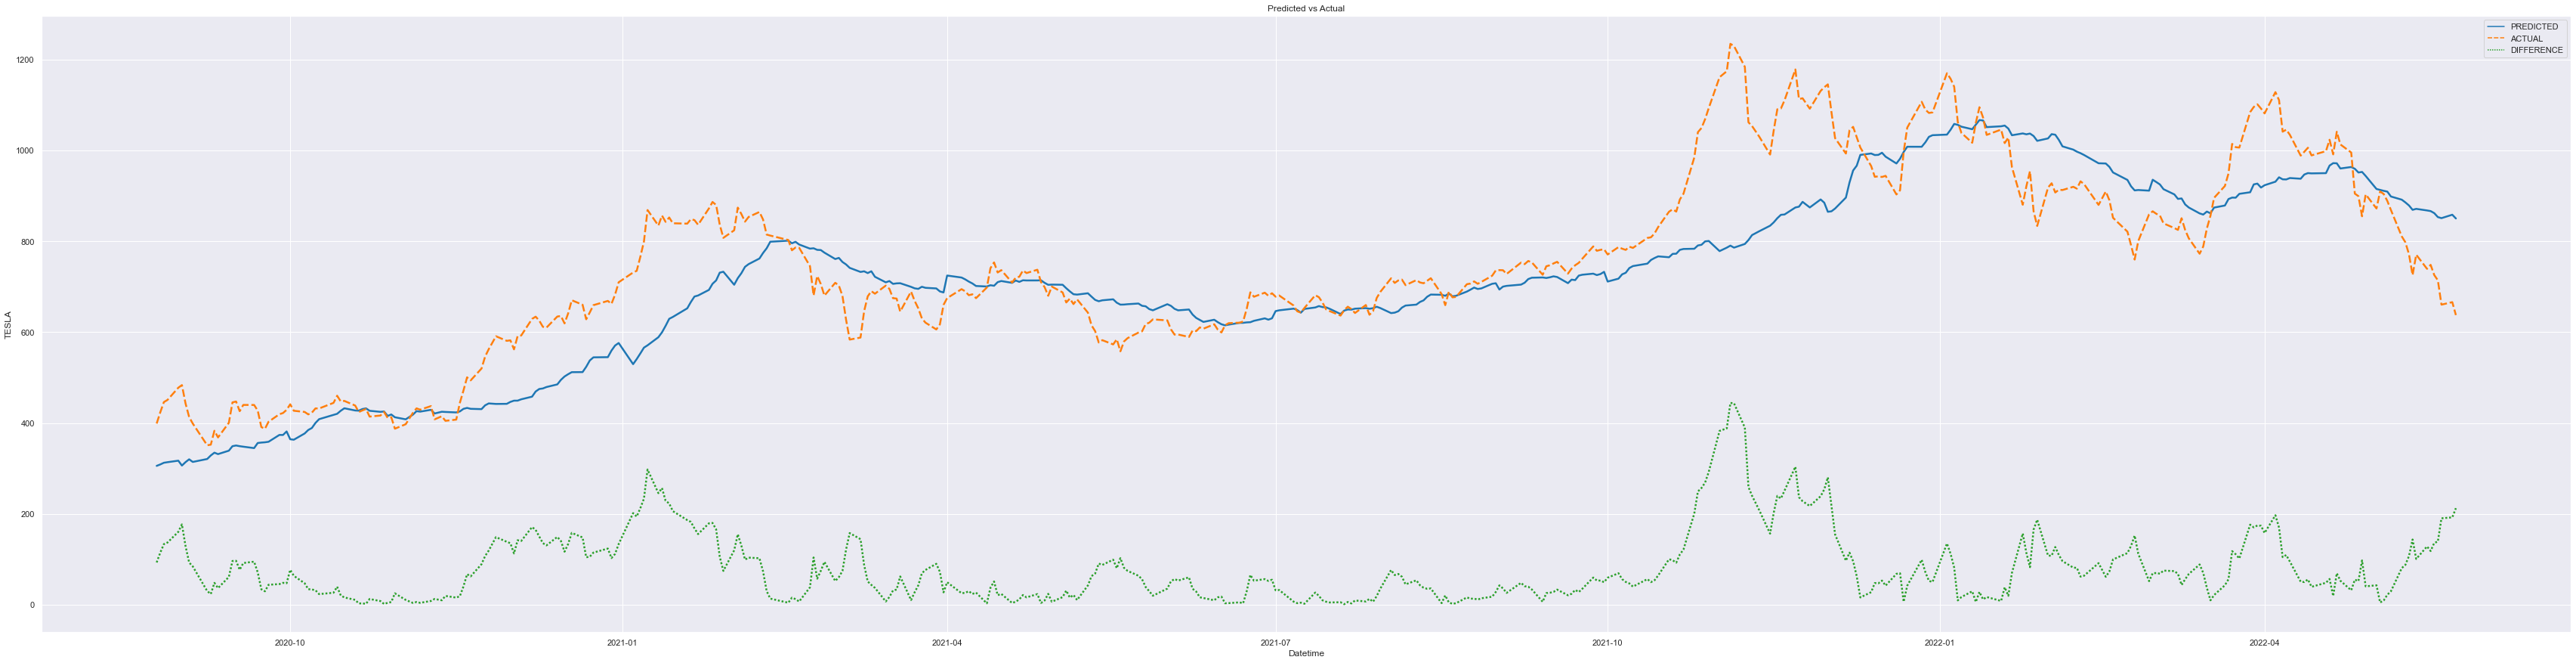

In [6]:
graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())
plt.figure(figsize=(60,15))
linep = sns.lineplot(data = graph, palette="tab10", linewidth=2.5)
linep.set(xlabel='Datetime', ylabel='TESLA', title='Predicted vs Actual')
plt.show()

# 5. CALCULATE METRICS

In [7]:
#Check the overall RMSE value
rmse = np.sqrt(mean_squared_error(result['ACTUAL'], result['PREDICTED']))
rmse

109.12563031159671

In [8]:
#Check the overall MAPE value
mape = mean_absolute_percentage_error(result['ACTUAL'], result['PREDICTED'])
mape 

0.1029200002843861

In [9]:
#Check the mean difference
average = graph.DIFFERENCE.mean()
average

79.68903467936184

In [10]:
#Check the Mean Train Time
time = result.TRAIN_DURATION.mean()
time # Seconds

0.08918456271887583

In [11]:
metrics = {'RMSE': [rmse], 'MAPE': [mape], 'MAE': [average], 'MTT': [time]}
metrics = pd.DataFrame(data = metrics, index = ['SVR'])

In [26]:
#Writting files
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/output/'
graph.to_csv(path+file_name+'-GRAPH.csv', index=True)
result.to_csv(path+file_name+'-RESULT.csv', index=True)
metrics.to_csv(path+file_name+'-METRICS.csv', index=True)